In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-white')
plt.rcParams.update({'font.size': 15})
%matplotlib inline

## Import the dataset

In [2]:
users = pd.read_csv('C:/Users/USER/Desktop/Live Project 3/Dataset/Users.csv')
books = pd.read_csv('C:/Users/USER/Desktop/Live Project 3/Dataset/Books.csv')
book_ratings = pd.read_csv('C:/Users/USER/Desktop/Live Project 3/Dataset/Ratings.csv')

In [3]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
book_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
print(f'Users: {len(users)}\nBooks: {len(books)}\nRatings: {len(book_ratings)}')

Users: 278858
Books: 271360
Ratings: 1149780


## Investigate the 'users' dataframe

In [7]:
users.columns = users.columns.str.strip().str.lower().str.replace('-', '_')
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
users.dtypes

user_id       int64
location     object
age         float64
dtype: object

In [9]:
uniq_users = users.user_id.nunique()
all_users = users.user_id.count()
print(f'No. of unique user_id entries: {uniq_users} | Total user_id entries: {all_users}')

No. of unique user_id entries: 278858 | Total user_id entries: 278858


The 'User-ID' field is integers, 'Location' are strings', and the 'Age' values are floats.

We can probably change the ages to ints. Let's take a look at the values first.

In [10]:
print(sorted(users.age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

The age range goes from 0 to 244 years old! Obviously this cannot be correct; I'll set all ages less than 5 and older than 100 to NaN to try keep them realistic.

In [11]:
users.loc[(users.age<5) | (users.age>100), 'age'] = np.nan

In [12]:
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


Now let's have a look at the entire age range again.

In [13]:
print(sorted(users.age.unique()))

[nan, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]


Much better - now the ages go from 5 to 100, with missing values entered as NaN. Let's plot this to see how they are distributed.

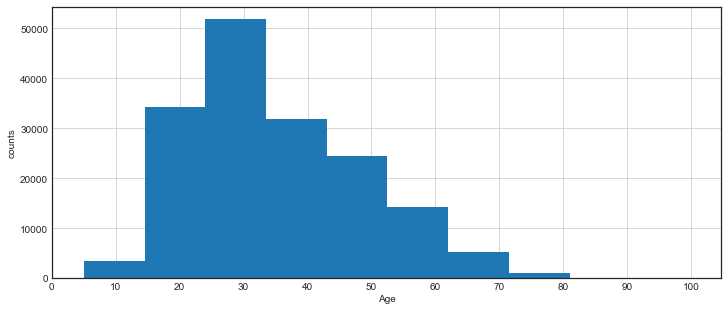

In [14]:
# First create a histogram of the Age field
ax = users.age.hist(bins=10, figsize=(12,5))
ax.set_xlabel('Age')
ax.set_ylabel('counts')
ax.set_xticks(range(0,110,10))
plt.show()

Below is the same plot without any binning - i.e. each age is represented individually.

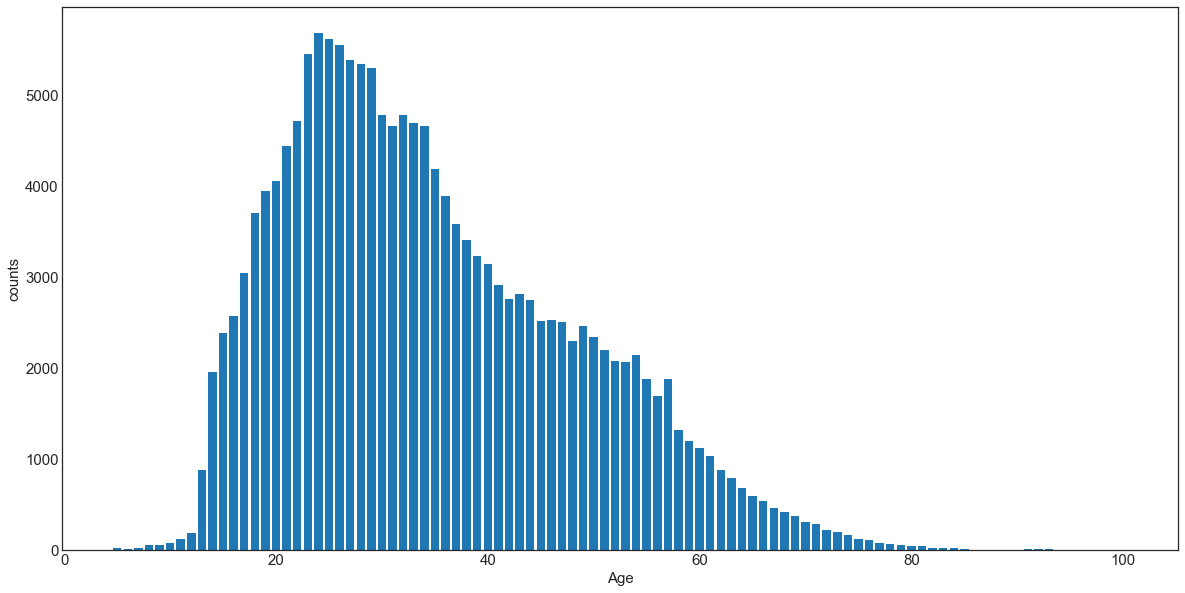

In [15]:
u = users.age.value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(u.index, u.values)
plt.xlabel('Age')
plt.ylabel('counts')
plt.show()

That is more clear to me! It seems that most of our reviewers are in their late 20s to early 30s.

How many missing Age's do we now have in the dataset?

In [16]:
age_null = users.age.isnull().sum() # Sums up the 1's returned by the isnull() mask
all_users = users.user_id.count() # Counts the number of cells in the series - excludes NaNs!
print(f'There are {age_null} empty age values in our set of {all_users} users (or {(age_null/all_users)*100:.2f}%).')

There are 112010 empty age values in our set of 278858 users (or 40.17%).


Next, can we expand the 'Location' field to break it up into 'City', 'State', and 'Country'.

In [17]:
# Note: Used Pandas Series.str.split method as it has an 'expand' parameter which can handle None cases
user_location_expanded = users.location.str.split(',', 2, expand=True)
user_location_expanded.columns = ['city', 'state', 'country']
users = users.join(user_location_expanded)

In [18]:
users.drop(columns=['location'], inplace=True)
users.head()

,user_id,age,city,state,country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


Let's take a quick look at these Location-derived fields.

In [19]:
top_cities = users.city.value_counts()[:10]
print(f'The 10 cities with the most users are:\n{top_cities}')

The 10 cities with the most users are:
london       4105
barcelona    2664
toronto      2342
madrid       1933
sydney       1884
portland     1869
melbourne    1863
vancouver    1699
chicago      1566
seattle      1541
Name: city, dtype: int64


In [20]:
top_countries = users.country.value_counts()[:10]
print(f'The 10 countries with the most users are:\n{top_countries}')

The 10 countries with the most users are:
 usa               139183
 canada             21556
 united kingdom     18286
 germany            17021
 spain              13088
 australia          11719
 italy              11238
                     4561
 france              3440
 portugal            3305
Name: country, dtype: int64


It looks like an empty 'Country' field is in the top 10 most common entries! 

In [21]:
empty_string_country = users[users.country == ''].country.count()
nan_country = users.country.isnull().sum()
print(f'There are {empty_string_country} entries with empty strings, and {nan_country} NaN entries in the Country field')

There are 4561 entries with empty strings, and 2 NaN entries in the Country field


In [22]:
users.country.replace('', np.nan, inplace=True)

**Might want to filter out invalid Location-based entries by looking at the city/state/country entries that only occur a few times (maybe <3), however this will be just left as is at the moment. I'll re-visit this idea more thoroughly if I end up using Location in the modeling**

## Investigate the 'books' dataframe

In [23]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [24]:
books.columns = books.columns.str.strip().str.lower().str.replace('-', '_') # clean column names
books.drop(columns=['image_url_s', 'image_url_m', 'image_url_l'], inplace=True) # drop image-url columns
books.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [25]:
books.dtypes

isbn                   object
book_title             object
book_author            object
year_of_publication    object
publisher              object
dtype: object

In [26]:
# Convert years to float
books.year_of_publication = pd.to_numeric(books.year_of_publication, errors='coerce')

In [27]:
# Check for 0's or NaNs in Year of Publication
zero_yr = books[books.year_of_publication == 0].year_of_publication.count()
nan_yr = books.year_of_publication.isnull().sum()
print(f'There are {zero_yr} entries as \'0\', and {nan_yr} NaN entries in the Year of Publication field')

There are 4618 entries as '0', and 3 NaN entries in the Year of Publication field


In [28]:
# Replace all years of zero with NaN
books.year_of_publication.replace(0, np.nan, inplace=True)

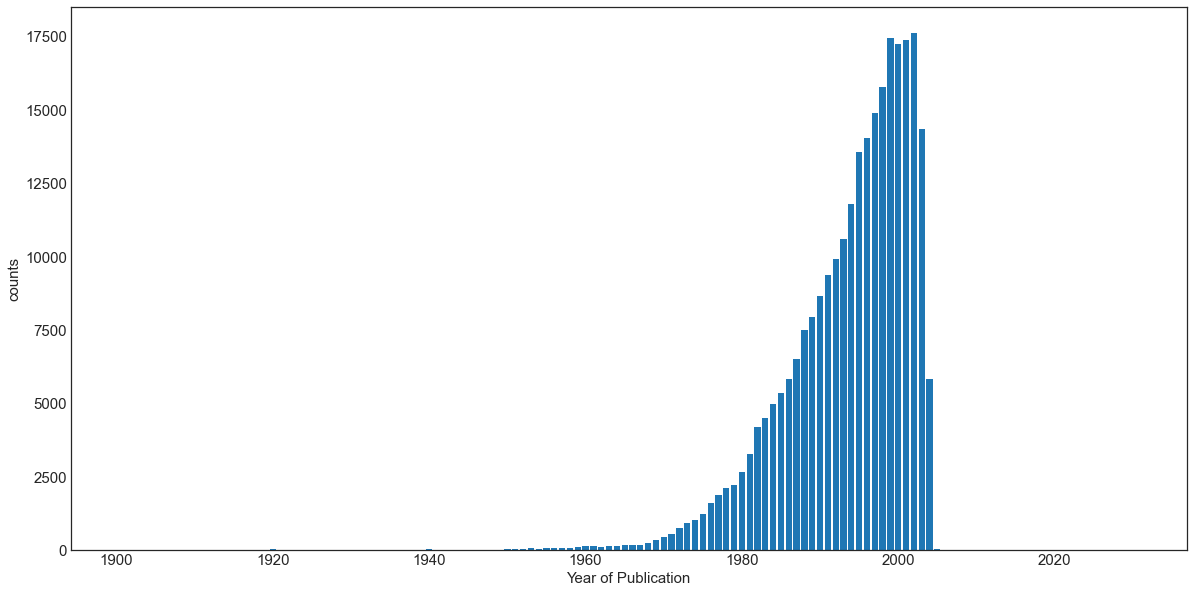

In [29]:
yr = books.year_of_publication.value_counts().sort_index()
yr = yr.where(yr>5) # filter out counts less than 5
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(yr.index, yr.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

In [30]:
historical_books = books[books.year_of_publication<1900] # create df of old books
books_from_the_future = books[books.year_of_publication>2018] # create df of books with publication yrs in the future!

hist_books_mini = historical_books[['book_title', 'year_of_publication']]
future_books_mini = books_from_the_future[['book_title', 'year_of_publication']]
print(f'Historical books:\n{hist_books_mini}')
print('\n')
print(f'Future books:\n{future_books_mini}')

Historical books:
                                               book_title  year_of_publication
171817  Complete Works 10 Volumes [2,6,7,8,9] (Notable...               1806.0
227531                   Dalan-i bihisht (Dastan-i Irani)               1378.0
245607  Hugh Wynne, Free Quaker (2 Volumes (BCL1-PS Am...               1897.0
253750                                       Tasht-i khun               1376.0


Future books:
                                               book_title  year_of_publication
30010                                          The Royals               2020.0
37487   MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...               2030.0
55676   MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...               2030.0
78168                                    Crossing America               2030.0
80264   Alice's Adventures in Wonderland and Through t...               2050.0
92156                     Edgar Allen Poe Collected Poems               2020.0
97826       Outlin

In [31]:
print(f'Length of books dataset before removal: {len(books)}')
books = books.loc[~(books.isbn.isin(historical_books.isbn))] # remove historical books
books = books.loc[~(books.isbn.isin(books_from_the_future.isbn))] # remove historical books
print(f'Length of books dataset after removal: {len(books)}')

Length of books dataset before removal: 271360
Length of books dataset after removal: 271339


In [32]:
books.publisher = books.publisher.str.replace('&amp', '&', regex=False)
books.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &; Company


In [33]:
uniq_books = books.isbn.nunique()
all_books = books.isbn.count()
print(f'No. of unique books: {uniq_books} | All book entries: {all_books}')

No. of unique books: 271339 | All book entries: 271339


In [34]:
top_publishers = books.publisher.value_counts()[:10]
print(f'The 10 publishers with the most entries in the books table are:\n{top_publishers}')

The 10 publishers with the most entries in the books table are:
Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3159
Simon &; Schuster           2969
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: publisher, dtype: int64


In [35]:
top_authors = books.book_author.value_counts()[:10]
print(f'The 10 authors with the most entries in the books table are:\n{top_authors}')

The 10 authors with the most entries in the books table are:
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: book_author, dtype: int64


In [36]:
empty_string_publisher = books[books.publisher == ''].publisher.count()
nan_publisher = books.publisher.isnull().sum()
print(f'There are {empty_string_publisher} entries with empty strings, and {nan_publisher} NaN entries in the Publisher field')

There are 0 entries with empty strings, and 2 NaN entries in the Publisher field


In [37]:
empty_string_author = books[books.book_author == ''].book_author.count()
nan_author = books.book_author.isnull().sum()
print(f'There are {empty_string_author} entries with empty strings, and {nan_author} NaN entries in the Author field')

There are 0 entries with empty strings, and 1 NaN entries in the Author field


In [38]:
top_titles = books.book_title.value_counts()[:10]
print(f'The 10 book titles with the most entries in the books table are:\n{top_titles}')

The 10 book titles with the most entries in the books table are:
Selected Poems                    27
Little Women                      24
Wuthering Heights                 21
Adventures of Huckleberry Finn    20
The Secret Garden                 20
Dracula                           20
Jane Eyre                         19
Pride and Prejudice               18
The Night Before Christmas        18
Great Expectations                17
Name: book_title, dtype: int64


In [39]:
books[books.book_title=='Jane Eyre']

,isbn,book_title,book_author,year_of_publication,publisher
3323,0451518845,Jane Eyre,Charlotte Bronte,1999.0,New Amer Library Classics
9545,0451523326,Jane Eyre,Charlotte Bronte,1988.0,Signet Classics
27657,1566193028,Jane Eyre,Charlotte Bronte,1994.0,Dorset Press
28501,156619024X,Jane Eyre,Charlotte Bronte,NaN,Barnes Noble Classics
40050,8426102069,Jane Eyre,Charlotte Bronte,1997.0,Juventud
41265,0553210203,Jane Eyre,Charlotte Bronte,1981.0,Bantam Books
58243,0460012878,Jane Eyre,Charlotte Bronte,1976.0,J m Dent &; Sons Ltd
69689,0141305371,Jane Eyre,Charlotte Bronte,1999.0,Puffin Books
72306,2253004359,Jane Eyre,Charlotte BrontÃ?Â«,1991.0,LGF
84642,0812523377,Jane Eyre,Charlotte Bronte,1994.0,Tor Books


## Investigate 'book_ratings' table

Again, let's tidy up the column names.

In [40]:
book_ratings.columns = book_ratings.columns.str.strip().str.lower().str.replace('-', '_')
book_ratings.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [41]:
book_ratings.dtypes

user_id         int64
isbn           object
book_rating     int64
dtype: object

In [42]:
super_users = book_ratings.groupby('user_id').isbn.count().sort_values(ascending=False)
print(f'The 20 users with the most ratings:\n{super_users[:20]}')

The 20 users with the most ratings:
user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
230522     2991
16795      2948
234623     2674
36836      2529
52584      2512
245963     2507
204864     2504
55492      2459
185233     2448
171118     2421
Name: isbn, dtype: int64


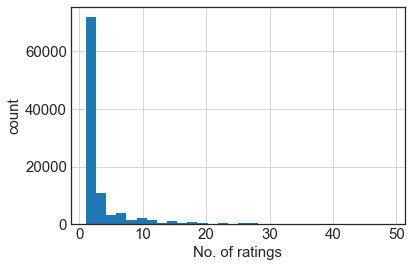

In [43]:
# user distribution - users with more than 50 ratings removed
user_hist = super_users.where(super_users<50)
user_hist.hist(bins=30)
plt.xlabel('No. of ratings')
plt.ylabel('count')
plt.show()

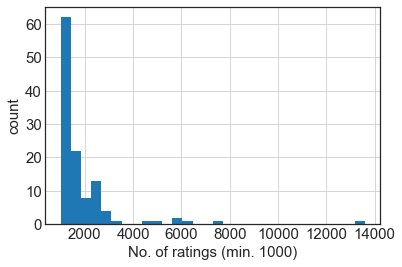

In [44]:
# only users with more than 1000 ratings
super_user_hist = super_users.where(super_users>1000)
super_user_hist.hist(bins=30)
plt.xlabel('No. of ratings (min. 1000)')
plt.ylabel('count')
plt.show()

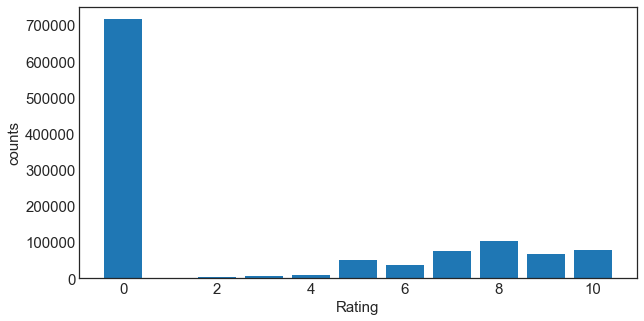

In [45]:
rtg = book_ratings.book_rating.value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(rtg.index, rtg.values)
plt.xlabel('Rating')
plt.ylabel('counts')
plt.show()

In [46]:
print(f'Size of book_ratings before removing zero ratings: {len(book_ratings)}')
book_ratings = book_ratings[book_ratings.book_rating != 0]
print(f'Size of book_ratings after removing zero ratings: {len(book_ratings)}')

Size of book_ratings before removing zero ratings: 1149780
Size of book_ratings after removing zero ratings: 433671


By removing the implicit ratings we have reduced our sample size by more than half.

Let's look at how the ratings are distributed again.

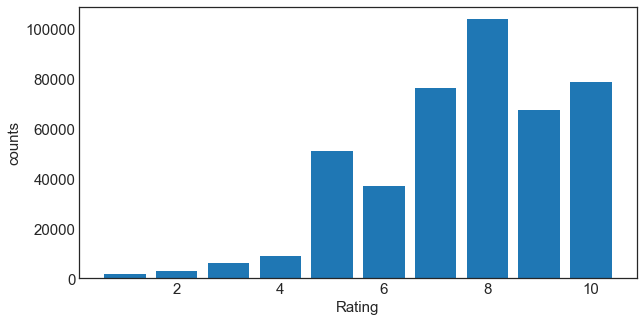

In [47]:
rtg = book_ratings.book_rating.value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(rtg.index, rtg.values)
plt.xlabel('Rating')
plt.ylabel('counts')
plt.show()

## Unify the 'users', 'books', and 'book_ratings' tables

In [48]:
print(f'Books table size: {len(books)}')
print(f'Ratings table size: {len(book_ratings)}')
books_with_ratings = book_ratings.join(books.set_index('isbn'), on='isbn')
print(f'New table size: {len(books_with_ratings)}')

Books table size: 271339
Ratings table size: 433671
New table size: 433671


Let's take a look at the new table.

In [49]:
books_with_ratings.head()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
6,276736,3257224281,8,NaN,NaN,NaN,NaN
7,276737,0600570967,6,NaN,NaN,NaN,NaN


In [50]:
print(f'There are {books_with_ratings.book_title.isnull().sum()} books with no title/author information.')
print(f'This represents {len(books_with_ratings)/books_with_ratings.book_title.isnull().sum():.2f}% of the ratings dataset.')

There are 49861 books with no title/author information.
This represents 8.70% of the ratings dataset.


In [51]:
books_with_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433671 entries, 1 to 1149779
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              433671 non-null  int64  
 1   isbn                 433671 non-null  object 
 2   book_rating          433671 non-null  int64  
 3   book_title           383810 non-null  object 
 4   book_author          383809 non-null  object 
 5   year_of_publication  378026 non-null  float64
 6   publisher            383808 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 26.5+ MB


In [52]:
books_with_ratings.dropna(subset=['book_title'], inplace=True) # remove rows with missing title/author data

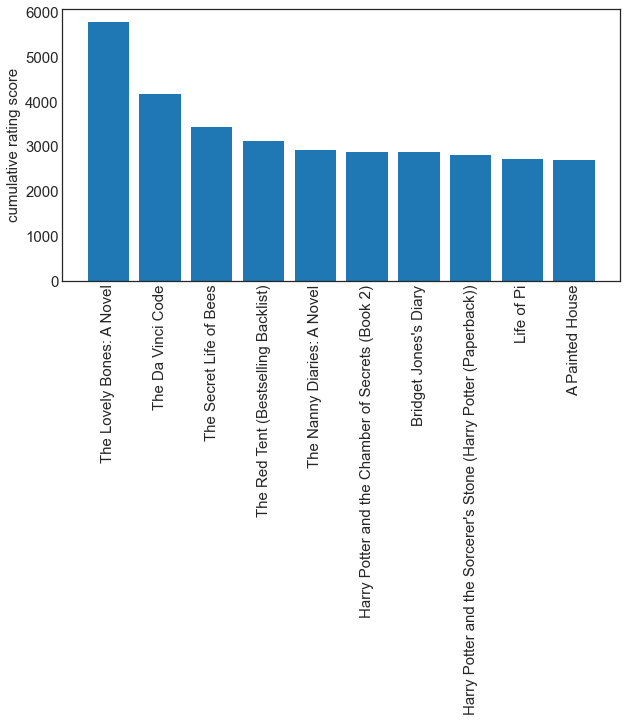

In [53]:
cm_rtg = books_with_ratings.groupby('book_title').book_rating.sum()
cm_rtg = cm_rtg.sort_values(ascending=False)[:10]
idx = cm_rtg.index.tolist()
vals = cm_rtg.values.tolist()

plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 15})
plt.bar(range(len(idx)), vals)
plt.xticks(range(len(idx)), idx, rotation='vertical')
plt.ylabel('cumulative rating score')
plt.show()

In [54]:
cutoff = books_with_ratings.book_title.value_counts()
mean_rtg = books_with_ratings[books_with_ratings.book_title.isin(cutoff[cutoff>50].index)].groupby('book_title')['book_rating'].mean()
mean_rtg.sort_values(ascending=False)[:10] # show only top 10

book_title
The Two Towers (The Lord of the Rings, Part 2)            9.330882
The Return of the King (The Lord of the Rings, Part 3)    9.213592
Harry Potter and the Goblet of Fire (Book 4)              9.125506
The Little Prince                                         9.111111
Charlotte's Web (Trophy Newbery)                          9.073529
Harry Potter and the Sorcerer's Stone (Book 1)            9.062500
84 Charing Cross Road                                     9.049180
Harry Potter and the Order of the Phoenix (Book 5)        9.047393
Harry Potter and the Prisoner of Azkaban (Book 3)         9.043321
To Kill a Mockingbird                                     8.977528
Name: book_rating, dtype: float64

In [55]:
mean_rtg.sort_values(ascending=False)[-10:] # bottom 10 only

book_title
Slow Waltz in Cedar Bend                                  6.619718
My Gal Sunday                                             6.607843
Hornet's Nest                                             6.591398
Bleachers                                                 6.583333
Full Tilt (Janet Evanovich's Full Series)                 6.568627
Songs in Ordinary Time (Oprah's Book Club (Paperback))    6.530303
4 Blondes                                                 5.653846
Isle of Dogs                                              5.433962
Four Blondes                                              5.393939
Wild Animus                                               4.390706
Name: book_rating, dtype: float64

## Restrict books to a "single ISBN per book" (regardless of format)

In [56]:
books_with_ratings.groupby('book_title').isbn.nunique().sort_values(ascending=False)[:10]

book_title
The Secret Garden                 18
Selected Poems                    16
Dracula                           15
Adventures of Huckleberry Finn    15
Jane Eyre                         14
Little Women                      14
Wuthering Heights                 14
Beloved                           14
Pride and Prejudice               14
The Hobbit                        12
Name: isbn, dtype: int64

In [57]:
multiple_isbns = books_with_ratings.groupby('book_title').isbn.nunique()
multiple_isbns.value_counts()

1     125322
2       7872
3       1497
4        493
5        181
6         86
7         44
8         27
9         11
10         8
14         5
15         2
11         2
16         1
12         1
18         1
Name: isbn, dtype: int64

In [58]:
has_mult_isbns = multiple_isbns.where(multiple_isbns>1)
has_mult_isbns.dropna(inplace=True) # remove NaNs

In [59]:
print(f'There are {len(has_mult_isbns)} book titles with multiple ISBN numbers which we will try to re-assign to a unique identifier')

There are 10231 book titles with multiple ISBN numbers which we will try to re-assign to a unique identifier


In [60]:
has_mult_isbns['Jane Eyre']

14.0

In [61]:
#Create dictionary for books with multiple isbns
def make_isbn_dict(df):
     title_isbn_dict = {}
     for title in has_mult_isbns.index:
         isbn_series = df.loc[df.book_title==title].isbn.unique() # returns only the unique ISBNs
         title_isbn_dict[title] = isbn_series.tolist()
     return title_isbn_dict

%time dict_unique_isbn = make_isbn_dict(books_with_ratings)

CPU times: total: 5min 34s
Wall time: 5min 36s


In [62]:
with open('multiple_isbn_dict.pickle', 'wb') as handle:
     pickle.dump(dict_unique_isbn, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [63]:
with open('multiple_isbn_dict.pickle', 'rb') as handle:
   multiple_isbn_dict = pickle.load(handle)

In [64]:
print(f'There are now {len(multiple_isbn_dict)} books in the ISBN dictionary that have multiple ISBN numbers')

There are now 10231 books in the ISBN dictionary that have multiple ISBN numbers


In [65]:
print(f'Length of Jane Eyre dict entry: {len(multiple_isbn_dict["Jane Eyre"])}\n')
multiple_isbn_dict['Jane Eyre']

Length of Jane Eyre dict entry: 14



['1590071212',
 '0451518845',
 '0451523326',
 '843761449X',
 '156619024X',
 '8426102069',
 '1566193028',
 '0141305371',
 '3548301231',
 '0812523377',
 '0517668432',
 '2253004359',
 '0553210203',
 '0451515560']

In [66]:
def add_unique_isbn_col(df):
    df['unique_isbn'] = df.apply(lambda row: multiple_isbn_dict[row.book_title][0] if row.book_title in multiple_isbn_dict.keys() else row.isbn, axis=1)
    return df

%time books_with_ratings = add_unique_isbn_col(books_with_ratings)

CPU times: total: 5.61 s
Wall time: 5.69 s


In [67]:
books_with_ratings.head()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,unique_isbn
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,0155061224
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,052165615X
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,0521795028
8,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001.0,Doubleday,038550120X
16,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003.0,HarperTorch,0060517794


In [203]:
books_with_ratings[books_with_ratings.book_title=='Jane Eyre'].head()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,unique_isbn
10481,387,1590071212,9,Jane Eyre,Charlotte Bronte,2002.0,New Millenium Audio,1590071212
16178,2718,0451518845,10,Jane Eyre,Charlotte Bronte,1999.0,New Amer Library Classics,1590071212
35499,8370,0451523326,8,Jane Eyre,Charlotte Bronte,1988.0,Signet Classics,1590071212
50842,11676,0451523326,9,Jane Eyre,Charlotte Bronte,1988.0,Signet Classics,1590071212
58066,11676,843761449X,8,Jane Eyre,Charlotte Bronte,1998.0,Ediciones Catedra S.A.,1590071212


## Join the 'users' table on the 'user_id' field

In [69]:
print(f'Books+Ratings table size: {len(books_with_ratings)}')
print(f'Users table size: {len(users)}')
books_users_ratings = books_with_ratings.join(users.set_index('user_id'), on='user_id')
print(f'New "books_users_ratings" table size: {len(books_users_ratings)}')

Books+Ratings table size: 383810
Users table size: 278858
New "books_users_ratings" table size: 383810


Inspect the new table.

In [70]:
books_users_ratings.head()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,unique_isbn,age,city,state,country
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,0155061224,NaN,seattle,washington,usa
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,052165615X,16.0,rijeka,n/a,croatia
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,0521795028,16.0,rijeka,n/a,croatia
8,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001.0,Doubleday,038550120X,NaN,torrance,california,usa
16,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003.0,HarperTorch,0060517794,25.0,iowa city,iowa,usa


In [71]:
books_users_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383810 entries, 1 to 1149778
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              383810 non-null  int64  
 1   isbn                 383810 non-null  object 
 2   book_rating          383810 non-null  int64  
 3   book_title           383810 non-null  object 
 4   book_author          383809 non-null  object 
 5   year_of_publication  378026 non-null  float64
 6   publisher            383808 non-null  object 
 7   unique_isbn          383810 non-null  object 
 8   age                  267996 non-null  float64
 9   city                 383810 non-null  object 
 10  state                383810 non-null  object 
 11  country              373330 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 38.1+ MB


In [72]:
books_users_ratings.shape

(383810, 12)

There are 383,820 entries in this dataset, with 12 fields/columns.

# Building a recommender system using collaborative filtering

Collaborative filtering use similarities of the 'user' and 'item' fields, with values of 'rating' predicted based on either user-item, or item-item similarity

In [73]:
user_item_rating = books_users_ratings[['user_id', 'unique_isbn', 'book_rating']]
user_item_rating.head()

,user_id,unique_isbn,book_rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


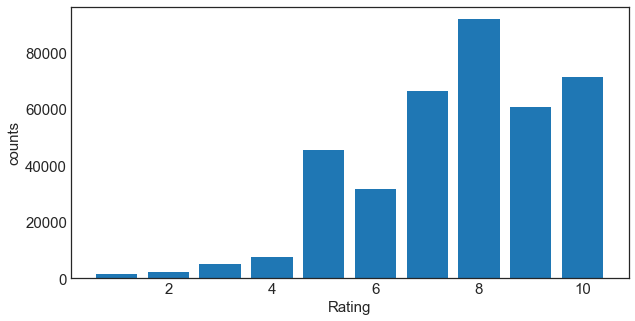

In [74]:
rtg = user_item_rating.book_rating.value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 15})
plt.bar(rtg.index, rtg.values)
plt.xlabel('Rating')
plt.ylabel('counts')
plt.show()

## Using ```sklearn``` to generate training and testing subsets

In [75]:
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(user_item_rating, test_size=0.20)

In [76]:
print(f'Training set size: {len(train_data)}')
print(f'Testing set size: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

Training set size: 307048
Testing set size: 76762
Test set is 20% of the full dataset.


### Map the ```user_id``` and ```unique_isbn``` fields to sequential integers for matrix processing

In [77]:
### TRAINING SET
# Get int mapping for user_id
u_unique_train = train_data.user_id.unique()  # create a 'set' (i.e. all unique) list of vals
train_data_user2idx = {o:i for i, o in enumerate(u_unique_train)}
# Get int mapping for unique_isbn
b_unique_train = train_data.unique_isbn.unique()  # create a 'set' (i.e. all unique) list of vals
train_data_book2idx = {o:i for i, o in enumerate(b_unique_train)}

### TESTING SET
# Get int mapping for user_id
u_unique_test = test_data.user_id.unique()  # create a 'set' (i.e. all unique) list of vals
test_data_user2idx = {o:i for i, o in enumerate(u_unique_test)}
# Get int mapping for unique_isbn
b_unique_test = test_data.unique_isbn.unique()  # create a 'set' (i.e. all unique) list of vals
test_data_book2idx = {o:i for i, o in enumerate(b_unique_test)}

In [78]:
### TRAINING SET
train_data['u_unique'] = train_data['user_id'].map(train_data_user2idx)
train_data['b_unique'] = train_data['unique_isbn'].map(train_data_book2idx)

### TESTING SET
test_data['u_unique'] = test_data['user_id'].map(test_data_user2idx)
test_data['b_unique'] = test_data['unique_isbn'].map(test_data_book2idx)

### Convert back to 3-column df
train_data = train_data[['u_unique', 'b_unique', 'book_rating']]
test_data = test_data[['u_unique', 'b_unique', 'book_rating']]

In [79]:
train_data.tail()

,u_unique,b_unique,book_rating
870633,6872,117121,10
430160,10691,38432,7
253345,19878,117122,10
292835,3983,61345,9
38447,26086,1125,5


In [80]:
train_data.dtypes

u_unique       int64
b_unique       int64
book_rating    int64
dtype: object

In [81]:
### TRAINING SET
# Create user-item matrices
n_users = train_data['u_unique'].nunique()
n_books = train_data['b_unique'].nunique()

# First, create an empty matrix of size USERS x BOOKS (this speeds up the later steps)
train_matrix = np.zeros((n_users, n_books))

# Then, add the appropriate vals to the matrix by extracting them from the df with itertuples
for entry in train_data.itertuples():
    train_matrix[entry[1]-1, entry[2]-1] = entry[3]

In [82]:
train_matrix.shape

(59804, 117123)

Now do the same for the test set.

In [83]:
### TESTING SET
# Create user-item matrices
n_users = test_data['u_unique'].nunique()
n_books = test_data['b_unique'].nunique()

# First, create an empty matrix of size USERS x BOOKS (this speeds up the later steps)
test_matrix = np.zeros((n_users, n_books))

# Then, add the appropriate vals to the matrix by extracting them from the df with itertuples
for entry in test_data.itertuples(): # entry[1] is the user-id, entry[2] is the book-isbn
    test_matrix[entry[1]-1, entry[2]-1] = entry[3] # -1 is to counter 0-based indexing

In [84]:
test_matrix.shape

(26030, 43286)

# Calculating cosine similarity with the 'pairwise distances' function

In [85]:
# It may take a while to calculate, so I'll perform on a subset initially
train_matrix_small = train_matrix[:10000, :10000]
test_matrix_small = test_matrix[:10000, :10000]

from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_matrix_small, metric='cosine')
item_similarity = pairwise_distances(train_matrix_small.T, metric='cosine') # .T transposes the matrix (NumPy)

In [86]:
def predict(ratings, similarity, type='user'): # default type is 'user'
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        # Use np.newaxis so that mean_user_rating has the same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [87]:
item_prediction = predict(train_matrix_small, item_similarity, type='item')
user_prediction = predict(train_matrix_small, user_similarity, type='user')

# Evaluation


In [88]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, test_matrix):
    prediction = prediction[test_matrix.nonzero()].flatten()
    test_matrix = test_matrix[test_matrix.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, test_matrix))

# Call on test set to get error from each approach ('user' or 'item')
print(f'User-based CF RMSE: {rmse(user_prediction, test_matrix_small)}')
print(f'Item-based CF RMSE: {rmse(item_prediction, test_matrix_small)}')

User-based CF RMSE: 7.911574556675753
Item-based CF RMSE: 7.912622856211527


# Using the ```surprise``` library for building a recommender system

In [89]:
from surprise import Reader, Dataset

In [90]:
user_item_rating.head()

,user_id,unique_isbn,book_rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [91]:
# First need to create a 'Reader' object to set the scale/limit of the ratings field
reader = Reader(rating_scale=(1, 10))

data = Dataset.load_from_df(user_item_rating, reader)

In [92]:
# Load the models and 'evaluation' method
from surprise import SVD, NMF, model_selection, accuracy

### SVD model

**_Using cross-validation (5 folds)_**

In [93]:
# Load SVD algorithm
model = SVD()

# Train on books dataset
%time model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6411  1.6315  1.6397  1.6281  1.6369  1.6354  0.0049  
Fit time          5.57    5.50    5.35    5.35    5.37    5.43    0.09    
Test time         0.69    0.75    0.55    0.45    0.46    0.58    0.12    
CPU times: total: 36 s
Wall time: 36.6 s


{'test_rmse': array([1.64106273, 1.63151056, 1.63967247, 1.6280788 , 1.63688773]),
 'fit_time': (5.569414854049683,
  5.496462821960449,
  5.352673292160034,
  5.348056316375732,
  5.365015983581543),
 'test_time': (0.6934270858764648,
  0.7513301372528076,
  0.5481998920440674,
  0.4539644718170166,
  0.455045223236084)}

The SVD model gives an average RMSE of ca. 1.64 after 5-folds, with a fit time of ca. 28 s for each fold.

**_Using test-train split_**

In [94]:
# set test set to 20%.
trainset, testset = model_selection.train_test_split(data, test_size=0.2)

# Instantiate the SVD model.
model = SVD()

# Train the algorithm on the training set, and predict ratings for the test set
model.fit(trainset)
predictions = model.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 1.6324


1.6323619925329658

### NMF model

In [95]:
# Load NMF algorithm
model = NMF()
# Train on books dataset
%time model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.4619  2.4686  2.4695  2.4818  2.4672  2.4698  0.0066  
Fit time          16.63   16.45   16.59   16.50   16.62   16.56   0.07    
Test time         0.41    0.78    0.42    0.78    0.41    0.56    0.18    
CPU times: total: 1min 31s
Wall time: 1min 31s


{'test_rmse': array([2.46187206, 2.46862228, 2.46948658, 2.48182907, 2.46723737]),
 'fit_time': (16.629392385482788,
  16.445783138275146,
  16.586475133895874,
  16.50404977798462,
  16.620038747787476),
 'test_time': (0.4062347412109375,
  0.782142162322998,
  0.4237682819366455,
  0.7826406955718994,
  0.40717267990112305)}

# Optimizing the SVD algorithm with parameter tuning

In [96]:
# We'll remake the training set, keeping 20% for testing
trainset, testset = model_selection.train_test_split(data, test_size=0.2)

In [97]:
### Fine-tune Surprise SVD model useing GridSearchCV
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [80, 100, 120], 'lr_all': [0.001, 0.005, 0.01], 'reg_all': [0.01, 0.02, 0.04]}

# Optimize SVD algorithm for both root mean squared error ('rmse') and mean average error ('mae')
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

In [98]:
# Fit the gridsearch result on the entire dataset
%time gs.fit(data)

CPU times: total: 7min 16s
Wall time: 7min 19s


In [99]:
# Return the best version of the SVD algorithm
model = gs.best_estimator['rmse']

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.6368576035342863
{'n_factors': 80, 'lr_all': 0.005, 'reg_all': 0.04}


In [100]:
model_selection.cross_validate(model, data, measures=['rmse', 'mae'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6307  1.6259  1.6358  1.6275  1.6316  1.6303  0.0035  
MAE (testset)     1.2580  1.2555  1.2635  1.2561  1.2597  1.2586  0.0029  
Fit time          4.79    4.81    5.22    4.83    4.98    4.93    0.16    
Test time         0.45    0.45    0.67    0.49    0.83    0.58    0.15    


{'test_rmse': array([1.63070558, 1.62590795, 1.63584288, 1.62749436, 1.6315551 ]),
 'test_mae': array([1.25797367, 1.25551161, 1.26351156, 1.25612951, 1.25973431]),
 'fit_time': (4.786383867263794,
  4.805574893951416,
  5.2225260734558105,
  4.833484888076782,
  4.978593826293945),
 'test_time': (0.4517993927001953,
  0.45405006408691406,
  0.6670002937316895,
  0.48825788497924805,
  0.8272697925567627)}

The mean RSME using the optimized parameters was 1.6351 over 5 folds, with an average fit time of ca. 24s.

In [101]:
### Use the new parameters with the training set
model = SVD(n_factors=80, lr_all=0.005, reg_all=0.04)
model.fit(trainset) # re-fit on only the training data using the best hyperparameters
test_pred = model.test(testset)
print("SVD : Test Set")
accuracy.rmse(test_pred, verbose=True)

SVD : Test Set
RMSE: 1.6380


1.638024577799006

# Testing some of the outputs (ratings and recommendations)

In [102]:
# get a prediction for specific users and items.
uid = 276744
iid = '038550120X' # the unique_isbn string

pred = model.predict(uid, iid, verbose=True)

user: 276744     item: 038550120X r_ui = None   est = 6.97   {'was_impossible': False}


Can access the attributes of the ```predict``` method to get a nicer output.

In [103]:
print(f'The estimated rating for the book with the "unique_isbn" code {pred.iid} from user #{pred.uid} is {pred.est:.2f}.\n')
actual_rtg = user_item_rating[(user_item_rating.user_id==pred.uid) & (user_item_rating.unique_isbn==pred.iid)].book_rating.values[0]
print(f'The real rating given for this was {actual_rtg:.2f}.')

The estimated rating for the book with the "unique_isbn" code 038550120X from user #276744 is 6.97.

The real rating given for this was 7.00.


In [104]:
# get a prediction for specific users and items.
uid = 95095
iid = '0140079963' # the unique_isbn string

pred = model.predict(uid, iid, verbose=True)

user: 95095      item: 0140079963 r_ui = None   est = 7.03   {'was_impossible': False}


In [105]:
print(f'The estimated rating for the book with the "unique_isbn" code {pred.iid} from user #{pred.uid} is {pred.est:.2f}.\n')
actual_rtg = user_item_rating[(user_item_rating.user_id==pred.uid) & (user_item_rating.unique_isbn==pred.iid)].book_rating.values[0]
print(f'The real rating given for this was {actual_rtg:.2f}.')

The estimated rating for the book with the "unique_isbn" code 0140079963 from user #95095 is 7.03.

The real rating given for this was 6.00.


In [106]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
        
    return top_n

Let's get the Top 10 recommended books for each user_id in the test set.

In [107]:
pred = model.test(testset)
top_n = get_top_n(pred)

In [108]:
def get_reading_list(userid):
    """
    Retrieve full book titles from full 'books_users_ratings' dataframe
    """
    reading_list = defaultdict(list)
    top_n = get_top_n(predictions, n=10)
    for n in top_n[userid]:
        book, rating = n
        title = books_users_ratings.loc[books_users_ratings.unique_isbn==book].book_title.unique()[0]
        reading_list[title] = rating
    return reading_list

In [194]:
# Just take a random look at user_id
example_reading_list = get_reading_list(userid=735)
for book, rating in example_reading_list.items():
    print(f'{book}: {rating}')

Their Eyes Were Watching God: A Novel: 10
Rendezvous with Rama: 9.605831690280178
Cold Mountain : A Novel: 9.560658361493852
China Governess: 9.429774883719762
Helter Skelter: The True Story of the Manson Murders: 9.411113868849247
American Gods: 9.37527306452925
The Professor and the Madman: 9.308898473562854
Midnight in the Garden of Good and Evil: A Savannah Story: 9.294194645700042
Doomsday Book: 9.204625245465456
Paris Trout (Contemporary American Fiction): 9.202570660205735


In [204]:
books_with_ratings[books_with_ratings.book_title=='High Wizardry: The Third Book in the Young Wizards Series'].head(10)

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,unique_isbn
11313,709,0152162445,10,High Wizardry: The Third Book in the Young Wiz...,Diane Duane,2001.0,Magic Carpet Books,0152162445
852257,206016,0152162445,7,High Wizardry: The Third Book in the Young Wiz...,Diane Duane,2001.0,Magic Carpet Books,0152162445
1002973,240700,0152162445,9,High Wizardry: The Third Book in the Young Wiz...,Diane Duane,2001.0,Magic Carpet Books,0152162445


In [220]:
books_with_ratings.loc[(books_with_ratings.user_id==245963)].head(20)

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,unique_isbn
1026599,245963,0070339740,9,"Fables and folktales (+ 10 vocabulary booster,...",William Kottmeyer,1973.0,"Webster Division, McGraw-Hill",0070339740
1026618,245963,0140026568,9,Penguin French Reader,Simon Lee,1967.0,Penguin USA,0140026568
1026658,245963,0140481621,10,After the Fall : A Play in Two Acts,Arthur Miller,1980.0,Penguin Books,0140481621
1026816,245963,0345334809,9,1000 Jokes for Kids of All Ages,Michael Kilgarriff,1991.0,Ballantine Books,0345334809
1026831,245963,0345351959,10,Willow: A Novel,Wayland Drew (Adapter),1988.0,Del Rey Books,0345351959
1026920,245963,0373097514,5,"Heartbreak Hank (Silhouette Special Edition, N...",Myrna Temte,1992.0,Silhouette,0373097514
1026961,245963,0373223927,5,To Have Vs To Hold (Justice Inc) (Harlequin In...,M. J. Rodgers,1996.0,Harlequin,0373223927
1027083,245963,0380455676,7,The Second Son,Charles Sailor,1979.0,Avon Books,0380455676
1027126,245963,0380720132,10,The Mystery of the Cupboard (Indian in the Cup...,Lynne Reid Banks,1999.0,HarperTrophy,0380720132
1027158,245963,0380790122,1,Waiting Games (An Avon Flare Book),Bruce Hart,1981.0,Harpercollins Juvenile Books,0380790122


In [ ]:
Deadly Bonds,Rainbow Six,Firewind,Penguin French Reader,To Have Vs To Hold (Justice Inc) (Harlequin Intrigue, No 392),Firewind,Willow: A Novel,Leslie Nielsen's Stupid Little Golf Book